# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

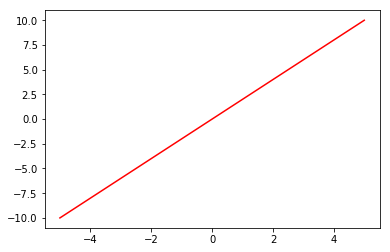

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5,5,100)
y = 2*x
plt.plot(x, y, '-r')

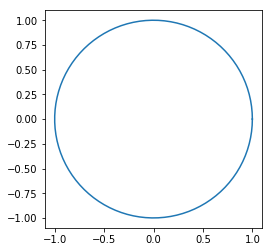

In [5]:
theta = np.linspace(0, 2*np.pi, 100)

r = 1

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

fig, ax = plt.subplots(1)
ax.plot(x1, x2)
ax.set_aspect(1)
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Each input should correspond to a single output.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

2, because it is the only one where an x value does not correspond to multiple y values

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

Domain m = 3, codomain = 3
Domain n = 4, codomain = 2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes, for example a function that converts a circle into a cylinder.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [15]:
def p(x1,x2):
  return np.array([[x1 + 3*x2],[2*x2 - x1]])

def q(x1,x2,x3):
  return np.array([[4*x1 + x2 + 2*x3],[2*x2 - x1 + 3*x3],[5*x1 - 2*x3 +x2]])

transform_p = np.column_stack((p(1,0), p(0,1)))
transform_q = np.column_stack((q(1,0,0), q(0,1,0),q(0,0,1)))

print(transform_p)
print(transform_q)

[[ 1  3]
 [-1  2]]
[[ 4  1  2]
 [-1  2  3]
 [ 5  1 -2]]


## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [18]:
input_1 = np.array([1,1])
input_2 = np.array([1,1,1])

print(p(input_1[0],input_1[1]))
print(np.dot(transform_p,input_1))

print(q(input_2[0],input_2[1],input_2[2]))
print(np.dot(transform_q,input_2))



[[4]
 [1]]
[4 1]
[[7]
 [4]
 [4]]
[7 4 4]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

An eigenvector is an object that is unchanged under a transformation except by a scalar multiplication, which is the eigenvalue. 

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

The space tends to be very sparse in high dimensional sets, making many analytical methods untractable. They are generally hard to visualize and explore.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

You should have at least 5 times the number of observations as parameters.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [23]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [0]:
spec = {'setosa':0,'versicolor':1,'virginica':2}

df['species'].replace(spec, inplace=True)

In [30]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [43]:
# Principal Component Analysis
from numpy import array
from sklearn.decomposition import PCA
# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(df)
# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
# transform data
B = pca.transform(df)
print("\n Projected Data: \n", B)


 Eigenvectors: 
 [[ 0.33418606 -0.07826103  0.80046289  0.33708273  0.35753221]
 [ 0.68858026  0.68410307 -0.09876295 -0.06819839 -0.2084588 ]]

 Eigenvalues: 
 [4.83503474 0.25208634]

 Projected Data: 
 [[-2.86550669  0.30278044]
 [-2.89321339 -0.17698715]
 [-3.0557491  -0.16800629]
 [-2.92124902 -0.32502721]
 [-2.9067514   0.30233272]
 [-2.48899988  0.73972719]
 [-2.99106535 -0.11673983]
 [-2.81105291  0.15563581]
 [-3.05248032 -0.58968758]
 [-2.85470148 -0.11163329]
 [-2.70085679  0.63629884]
 [-2.79784383  0.00804347]
 [-2.96034027 -0.23902533]
 [-3.36757216 -0.55368658]
 [-2.83079955  1.14659075]
 [-2.58796715  1.30810539]
 [-2.80918503  0.77923237]
 [-2.83179842  0.2959606 ]
 [-2.41462623  0.8847108 ]
 [-2.77523044  0.49131523]
 [-2.51728591  0.41131533]
 [-2.73369607  0.41608508]
 [-3.36061098  0.0664058 ]
 [-2.5085908   0.11587143]
 [-2.55770496 -0.02158542]
 [-2.69970221 -0.12788171]
 [-2.66359007  0.13211984]
 [-2.7520418   0.36176217]
 [-2.82426199  0.30322816]
 [-2.815610

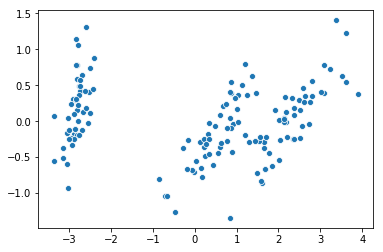

In [39]:
import seaborn as sns


d = []
e = []
for i in B:
  d.append(i[0])
  e.append(i[1])
  
sns.scatterplot(d,e)

In [41]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

means = mean(df.T, axis=1)
print("\n Means: \n", means)
# center columns by subtracting column means
centered_data = df - means
print("\n Centered Data: \n", centered_data)
# calculate covariance matrix of centered matrix

covariance_matrix = cov(centered_data.T)
print("\n Covariance Matrix: \n", covariance_matrix)
# eigendecomposition of covariance matrix
values, vectors = eig(covariance_matrix)
print("\n Eigenvectors: \n", vectors)
print("\n Eigenvalues: \n", values)
# project data
P = vectors.T.dot(centered_data.T)
print("\n Projected Data: \n", P.T)


 Means: 
 sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
species         1.000000
dtype: float64

 Centered Data: 
      sepal_length  sepal_width  petal_length  petal_width  species
0       -0.743333        0.446     -2.358667    -0.998667     -1.0
1       -0.943333       -0.054     -2.358667    -0.998667     -1.0
2       -1.143333        0.146     -2.458667    -0.998667     -1.0
3       -1.243333        0.046     -2.258667    -0.998667     -1.0
4       -0.843333        0.546     -2.358667    -0.998667     -1.0
5       -0.443333        0.846     -2.058667    -0.798667     -1.0
6       -1.243333        0.346     -2.358667    -0.898667     -1.0
7       -0.843333        0.346     -2.258667    -0.998667     -1.0
8       -1.443333       -0.154     -2.358667    -0.998667     -1.0
9       -0.943333        0.046     -2.258667    -1.098667     -1.0
10      -0.443333        0.646     -2.258667    -0.998667     -1.0
11      -1.043333        0

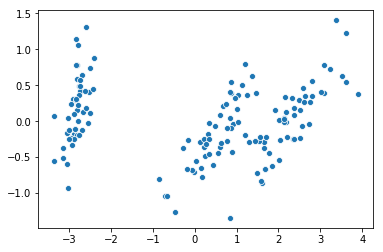

In [45]:
f = []
g = []
for i in P.T:
  f.append(-i[0]) #The manual method flips the x values compared to the sklearn method
  g.append(i[1])
  
sns.scatterplot(f,g)

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)